In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'MARUTI.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-09,164.899994,170.399994,155.000000,164.300003,142.607697,35164284
2003-07-10,167.000000,168.699997,164.500000,167.000000,144.951263,10464179
2003-07-11,167.750000,174.850006,166.250000,173.350006,150.462875,11740117
2003-07-14,174.250000,179.250000,174.250000,177.949997,154.455521,5982324
2003-07-15,200.000000,200.000000,173.000000,176.199997,152.936584,6173689
...,...,...,...,...,...,...
2024-06-21,12220.000000,12366.250000,12083.500000,12201.500000,12201.500000,947800
2024-06-24,12181.000000,12289.000000,12041.000000,12183.400391,12183.400391,550862
2024-06-25,12201.400391,12237.799805,12072.049805,12116.599609,12116.599609,594272


In [3]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

[array([0.00000000e+00, 2.10343203e-04, 7.05040290e-04, 1.06340248e-03,
       9.27068764e-04, 9.97183958e-04, 6.15448852e-04, 2.41504719e-04,
       4.67422736e-05, 2.29819448e-04, 8.10211297e-04, 7.63469023e-04,
       7.28410832e-04, 1.13351767e-03, 1.24647965e-03, 1.30880387e-03,
       1.28932763e-03, 1.78012804e-03, 2.59423601e-03, 2.28261610e-03])]
[0.0021268061406930026]

[array([0.00000000e+00, 2.10343203e-04, 7.05040290e-04, 1.06340248e-03,
       9.27068764e-04, 9.97183958e-04, 6.15448852e-04, 2.41504719e-04,
       4.67422736e-05, 2.29819448e-04, 8.10211297e-04, 7.63469023e-04,
       7.28410832e-04, 1.13351767e-03, 1.24647965e-03, 1.30880387e-03,
       1.28932763e-03, 1.78012804e-03, 2.59423601e-03, 2.28261610e-03]), array([2.10343203e-04, 7.05040290e-04, 1.06340248e-03, 9.27068764e-04,
       9.97183958e-04, 6.15448852e-04, 2.41504719e-04, 4.67422736e-05,
       2.29819448e-04, 8.10211297e-04, 7.63469023e-04, 7.28410832e-04,
       1.13351767e-03, 1.24647965e-03, 1.30880

In [6]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

154/154 [==============================] - 2s 16ms/step


0.999127163757994

In [7]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 16ms/step


0.981127337623726

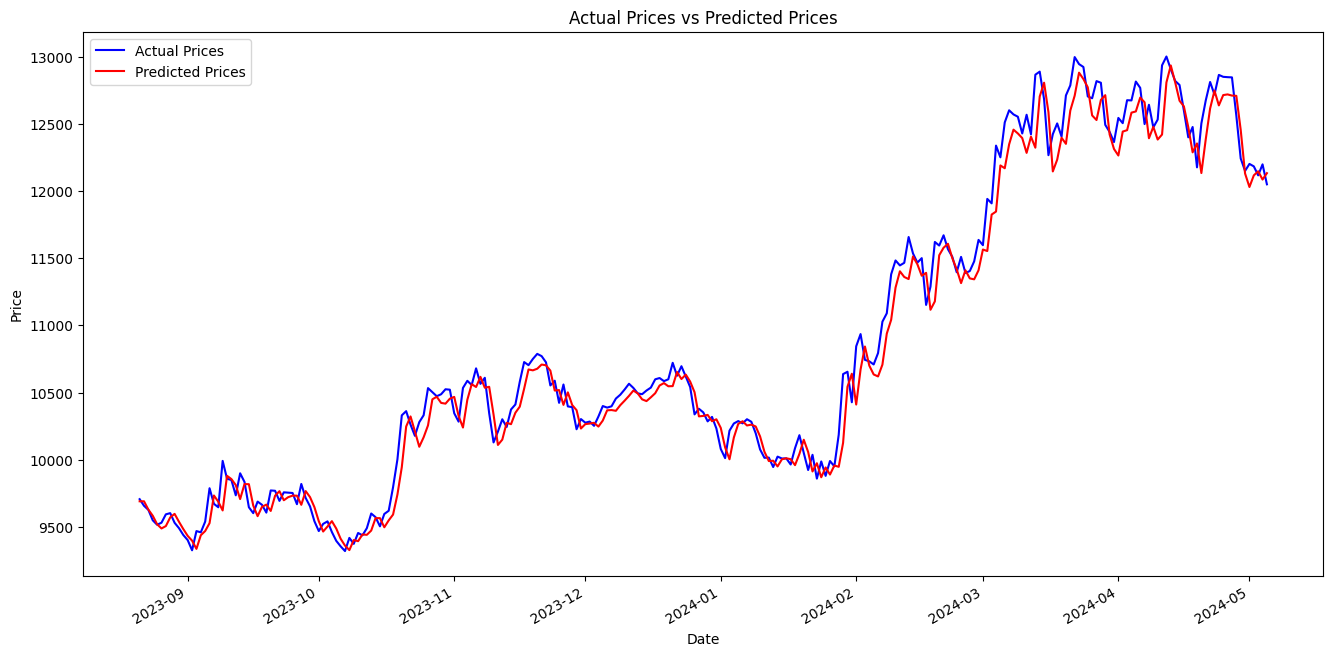

In [8]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [9]:
import joblib


model_file_path = '14.joblib'
scaler_file_path = 'scaler14.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 14.joblib
Scaler saved to scaler14.joblib
